<a href="https://colab.research.google.com/github/ganesh-bot-ai/LSTM-Stock-Predictor/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 #📦 Step 1: Install Necessary Libraries
# ================================
!pip install pandas matplotlib plotly scikit-learn tensorflow openpyxl

In [2]:
# 📦 Step 2: All Imports
# ================================
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go

from google.colab import files
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [3]:
# 📂 Step 3: Upload Dataset
# ================================
uploaded = files.upload()


Saving yahoo_data (1).xlsx to yahoo_data (1).xlsx


In [4]:
# 🧼 Step 4: Read Excel File
# ================================
filename = list(uploaded.keys())[0]
df = pd.read_excel(io.BytesIO(uploaded[filename]))


In [5]:
# Rename column for convenience
df.rename(columns={'Close*': 'Close'}, inplace=True)

# Now you can safely drop missing values and continue
df = df[['Close']].dropna()


In [6]:
# 🔄 Step 6: Normalize 'Close' Column
# ================================
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

In [7]:
# 🔗 Step 7: Create Sequences
# ================================
def create_sequences(data, seq_len=60):
    X, y = [], []
    for i in range(seq_len, len(data)):
        X.append(data[i - seq_len:i])
        y.append(data[i])
    return np.array(X), np.array(y)

seq_len = 60
X, y = create_sequences(scaled_data, seq_len)

In [8]:
# 🎯 Step 8: Train-Test Split
# ================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [9]:
# 🧠 Step 9: Build & Train LSTM Model
# ================================
model = Sequential([
    LSTM(50, return_sequences=False, input_shape=(X_train.shape[1], 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3121
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0075
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0046
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0029
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0022
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0022
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0018
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0018
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0019
Epoch 10/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0017
Epoch 11/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0016
Epoch 12/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0014
Epoch 13/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0016
Epoch 14/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0016
Epoch 15/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0014
Epoch 16/20
30/

In [10]:
# 🧪 Step 10: Predict & Inverse Transform
# ================================
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_actual_inv = scaler.inverse_transform(y_test)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step


In [11]:
# 📈 Step 11: Detect Buy/Sell Signals
# ================================
buy_signals = []
sell_signals = []

for i in range(1, len(y_pred_inv)):
    if y_pred_inv[i] > y_pred_inv[i-1] and y_actual_inv[i] < y_pred_inv[i]:
        buy_signals.append(i)
    elif y_pred_inv[i] < y_pred_inv[i-1] and y_actual_inv[i] > y_pred_inv[i]:
        sell_signals.append(i)


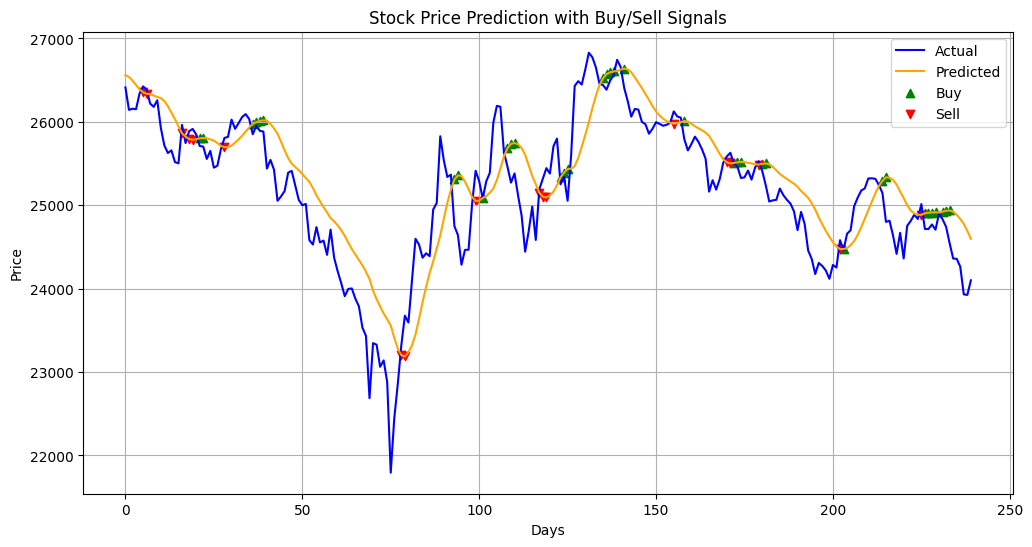

In [12]:
# 🖼️ Step 12: Static Line Plot (Matplotlib)
# ================================
plt.figure(figsize=(12, 6))
plt.plot(y_actual_inv, label='Actual', color='blue')
plt.plot(y_pred_inv, label='Predicted', color='orange')
plt.scatter(buy_signals, y_pred_inv[buy_signals], label='Buy', marker='^', color='green')
plt.scatter(sell_signals, y_pred_inv[sell_signals], label='Sell', marker='v', color='red')
plt.title('Stock Price Prediction with Buy/Sell Signals')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_actual_inv = scaler.inverse_transform(y_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [14]:
# 🎬 Step 13: Animated Plotly Chart
# ================================
def animate_predictions(y_true, y_pred):
    fig = go.Figure(
        data=[
            go.Scatter(x=[], y=[], name="Actual", mode='lines', line=dict(color='blue')),
            go.Scatter(x=[], y=[], name="Predicted", mode='lines', line=dict(color='orange'))
        ],
        layout=go.Layout(
            title="📊 Animated Stock Price Prediction",
            xaxis=dict(range=[0, len(y_true)]),
            yaxis=dict(range=[min(min(y_true), min(y_pred)) - 10, max(max(y_true), max(y_pred)) + 10]),
            updatemenus=[dict(
                type="buttons",
                showactive=False,
                buttons=[dict(label="Play", method="animate",
                              args=[None, {"frame": {"duration": 30, "redraw": True}, "fromcurrent": True}])]
            )]
        ),
        frames=[go.Frame(data=[
            go.Scatter(x=list(range(k + 1)), y=y_true[:k + 1].flatten(), mode='lines'),
            go.Scatter(x=list(range(k + 1)), y=y_pred[:k + 1].flatten(), mode='lines')
        ]) for k in range(1, len(y_true))]
    )  # Close the go.Figure constructor properly here

    fig.show()

animate_predictions(y_actual_inv, y_pred_inv)

In [15]:
# 📊 Step 14: Evaluation Summary
# ================================
rmse = np.sqrt(mean_squared_error(y_actual_inv, y_pred_inv))
mae = mean_absolute_error(y_actual_inv, y_pred_inv)

print(f"\n📊 Prediction Summary:")
print(f"• RMSE: {rmse:.2f}")
print(f"• MAE : {mae:.2f}")
print("\n📈 Strategy Tips:")
print("• Buy when predicted price is rising and current price is low (green ↑)")
print("• Sell when predicted price is falling and current price is high (red ↓)")



📊 Prediction Summary:
• RMSE: 470.10
• MAE : 373.47

📈 Strategy Tips:
• Buy when predicted price is rising and current price is low (green ↑)
• Sell when predicted price is falling and current price is high (red ↓)
